## Link al notebook con las celdas de python para la resolucion de los ejercicios
https://github.com/JesuaVAlc/Deberes-Metodos-Numericos/blob/main/Tarea12_JesuaVillacis.ipynb

**1.** Use el método de Euler para aproximar las soluciones para cada uno de los siguientes problemas de valor inicial.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.5f}'.format

In [4]:
def metodo_euler(f, t0, y0, tf, h):
    tiempos = np.arange(t0, tf + h, h)
    w = np.zeros(len(tiempos))
    w[0] = y0
    
    for i in range(len(tiempos) - 1):
        w[i+1] = w[i] + h * f(tiempos[i], w[i])
        
    return tiempos, w

**a)** $y' = t e^{3t} - 2y, \quad 0 \leq t \leq 1, \quad y(0) = 0, \quad \text{con } h=0.5$

In [15]:
fa = lambda t, y: t * np.exp(3*t) - 2*y
ta, wa = metodo_euler(fa, t0=0, y0=0, tf=1, h=0.5)
df_a = pd.DataFrame({'t_i': ta, 'w_i (Aprox. Euler)': wa})
print(df_a.to_string())

      t_i  w_i (Aprox. Euler)
0 0.00000             0.00000
1 0.50000             0.00000
2 1.00000             1.12042


**b)** $y' = 1 + (t - y)^2, \quad 2 \leq t \leq 3, \quad y(2) = 1, \quad \text{con } h=0.5$

In [16]:
fb = lambda t, y: 1 + (t - y)**2
tb, wb = metodo_euler(fb, t0=0, y0=0, tf=1, h=0.5)
dfb = pd.DataFrame({'t_i': tb, 'w_i (Aprox. Euler)': wb})
print(dfb.to_string())

      t_i  w_i (Aprox. Euler)
0 0.00000             0.00000
1 0.50000             0.50000
2 1.00000             1.00000


**c)** $y' = 1 + \frac{y}{t}, \quad 1 \leq t \leq 2, \quad y(1) = 2, \quad \text{con } h=0.25$

In [17]:
fc = lambda t, y: 1 + y/t
tc, wc = metodo_euler(fc, t0=1, y0=2, tf=2, h=0.25)
dfc = pd.DataFrame({'t_i': tc, 'w_i (Aprox. Euler)': wc})
print(dfc.to_string())

      t_i  w_i (Aprox. Euler)
0 1.00000             2.00000
1 1.25000             2.75000
2 1.50000             3.55000
3 1.75000             4.39167
4 2.00000             5.26905


**d)** $y' = \cos 2t + \sin 3t, \quad 0 \leq t \leq 1, \quad y(0) = 1, \quad \text{con } h=0.25$

In [18]:
fd = lambda t, y: np.cos(2*t) + np.sin(3*t)
td, wd = metodo_euler(fd, t0=0, y0=1, tf=1, h=0.25)
dfd = pd.DataFrame({'t_i': td, 'w_i (Aprox. Euler)': wd})
print(dfd.to_string())

      t_i  w_i (Aprox. Euler)
0 0.00000             1.00000
1 0.25000             1.25000
2 0.50000             1.63981
3 0.75000             2.02425
4 1.00000             2.23646


**2.** Las soluciones reales para los problemas de valor inicial en el ejercicio 1 se proporcionan aquí. Compare el error
real en cada paso.

**a)** $y(t) = \frac{1}{5} t e^{3t} - \frac{1}{25} e^{3t} + \frac{1}{25} e^{-2t}$

In [26]:
ya = lambda t: (1/5)*t*np.exp(3*t) - (1/25)*np.exp(3*t) + (1/25)*np.exp(-2*t)
print("\nTabla de comparación:")
df_a = pd.DataFrame({'t_i': ta, 'w_i (Aprox. Euler)': wa})
df_a['y(t_i) (Valor Real)'] = ya(ta)

# Cálculo del Error Relativo
exact_vals = df_a['y(t_i) (Valor Real)']
aprox_vals = df_a['w_i (Aprox. Euler)']
# np.where para evitar la división por cero cuando el valor real es 0
df_a['Error Relativo'] = np.where(exact_vals == 0, 0, np.abs((exact_vals - aprox_vals) / exact_vals))
print(df_a.to_string())


Tabla de comparación:
      t_i  w_i (Aprox. Euler)  y(t_i) (Valor Real)  Error Relativo
0 0.00000             0.00000              0.00000         0.00000
1 0.50000             0.00000              0.28362         1.00000
2 1.00000             1.12042              3.21910         0.65195


**b)** $y(t) = t + \frac{1}{1 - t}$

In [27]:
yb = lambda t: t + 1/(1 - t)
print("\nTabla de comparación¿:")
df_b = pd.DataFrame({'t_i': tb, 'w_i (Aprox. Euler)': wb})
df_b['y(t_i) (Valor Real)'] = yb(tb)

exact_vals = df_b['y(t_i) (Valor Real)']
aprox_vals = df_b['w_i (Aprox. Euler)']
df_b['Error Relativo'] = np.where(exact_vals == 0, 0, np.abs((exact_vals - aprox_vals) / exact_vals))

print(df_b.to_string())


Tabla de comparación¿:
      t_i  w_i (Aprox. Euler)  y(t_i) (Valor Real)  Error Relativo
0 0.00000             0.00000              1.00000         1.00000
1 0.50000             0.50000              2.50000         0.80000
2 1.00000             1.00000                  inf             NaN


/tmp/ipykernel_874/447480362.py:1: RuntimeWarning: divide by zero encountered in divide
  yb = lambda t: t + 1/(1 - t)


**c)** $y(t) = t \ln t + 2t$

In [28]:
yc = lambda t: t * np.log(t) + 2*t
print("\nTabla de comparación:")
df_c = pd.DataFrame({'t_i': tc, 'w_i (Aprox. Euler)': wc})
df_c['y(t_i) (Valor Real)'] = yc(tc)

exact_vals = df_c['y(t_i) (Valor Real)']
aprox_vals = df_c['w_i (Aprox. Euler)']
df_c['Error Relativo'] = np.where(exact_vals == 0, 0, np.abs((exact_vals - aprox_vals) / exact_vals))

print(df_c.to_string())


Tabla de comparación:
      t_i  w_i (Aprox. Euler)  y(t_i) (Valor Real)  Error Relativo
0 1.00000             2.00000              2.00000         0.00000
1 1.25000             2.75000              2.77893         0.01041
2 1.50000             3.55000              3.60820         0.01613
3 1.75000             4.39167              4.47933         0.01957
4 2.00000             5.26905              5.38629         0.02177


**d)** $y(t) = \frac{1}{2} \sin 2t - \frac{1}{2} \cos 3t + \frac{4}{3}$

In [29]:
yd = lambda t: 0.5*np.sin(2*t) - (1/3)*np.cos(3*t) + 4/3
print("\nTabla de comparación:")
df_d = pd.DataFrame({'t_i': td, 'w_i (Aprox. Euler)': wd})
df_d['y(t_i) (Valor Real)'] = yd(td)

exact_vals = df_d['y(t_i) (Valor Real)']
aprox_vals = df_d['w_i (Aprox. Euler)']
df_d['Error Relativo'] = np.where(exact_vals == 0, 0, np.abs((exact_vals - aprox_vals) / exact_vals))

print(df_d.to_string())


Tabla de comparación:
      t_i  w_i (Aprox. Euler)  y(t_i) (Valor Real)  Error Relativo
0 0.00000             1.00000              1.00000         0.00000
1 0.25000             1.25000              1.32915         0.05955
2 0.50000             1.63981              1.73049         0.05240
3 0.75000             2.02425              2.04147         0.00843
4 1.00000             2.23646              2.11798         0.05594


**3.**  Utilice el método de Euler para aproximar las soluciones para cada uno de los siguientes problemas de valor inicial

**a)** $y' = \frac{y}{t} - \left( \frac{y}{t} \right)^2, \quad 1 \leq t \leq 2, \quad y(1) = 1, \quad \text{con } h=0.1$

In [41]:
f_3a = lambda t, y: (y/t) - (y/t)**2
t_3a, w_3a = metodo_euler(f_3a, t0=1, y0=1, tf=2, h=0.1)
print("Resultados de Euler:")
print(pd.DataFrame({'t_i': t_3a, 'w_i': w_3a}).to_string())

Resultados de Euler:
       t_i     w_i
0  1.00000 1.00000
1  1.10000 1.00000
2  1.20000 1.00826
3  1.30000 1.02169
4  1.40000 1.03851
5  1.50000 1.05767
6  1.60000 1.07846
7  1.70000 1.10043
8  1.80000 1.12326
9  1.90000 1.14672
10 2.00000 1.17065


**b)** $y' = 1 + \frac{y}{t} + \left( \frac{y}{t} \right)^2, \quad 1 \leq t \leq 3, \quad y(1) = 0, \quad \text{con } h=0.2$

In [42]:
f_3b = lambda t, y: 1+ (y/t) + (y/t)**2
t_3b, w_3b = metodo_euler(f_3b, t0=1, y0=0, tf=3, h=0.2)
print("Resultados de Euler:")
print(pd.DataFrame({'t_i': t_3b, 'w_i': w_3b}).to_string())

Resultados de Euler:
       t_i     w_i
0  1.00000 0.00000
1  1.20000 0.20000
2  1.40000 0.43889
3  1.60000 0.72124
4  1.80000 1.05204
5  2.00000 1.43725
6  2.20000 1.88426
7  2.40000 2.40227
8  2.60000 3.00284
9  2.80000 3.70060
10 3.00000 4.51428


**c)** $y' = -(y+1)(y+3), \quad 0 \leq t \leq 2, \quad y(0) = -2, \quad \text{con } h=0.2$

In [43]:
f_3c = lambda t, y: -(y+1)*(y+3)
t_3c, w_3c = metodo_euler(f_3c, t0=0, y0=-2, tf=2, h=0.2)
print("Resultados de Euler:")
print(pd.DataFrame({'t_i': t_3c, 'w_i': w_3c}).to_string())

Resultados de Euler:
       t_i      w_i
0  0.00000 -2.00000
1  0.20000 -1.80000
2  0.40000 -1.60800
3  0.60000 -1.43873
4  0.80000 -1.30174
5  1.00000 -1.19925
6  1.20000 -1.12749
7  1.40000 -1.07975
8  1.60000 -1.04912
9  1.80000 -1.02995
10 2.00000 -1.01815


**d)** $y' = -5y + 5t^2 + 2t, \quad 0 \leq t \leq 1, \quad y(0) = \frac{1}{3}, \quad \text{con } h=0.1$

In [44]:
f_3d = lambda t, y: -5*y + 5*t**2 + 2*t
t_3d, w_3d = metodo_euler(f_3d, t0=0, y0=1/3, tf=1, h=0.1)
print("Resultados de Euler:")
print(pd.DataFrame({'t_i': t_3d, 'w_i': w_3d}).to_string())

Resultados de Euler:
       t_i     w_i
0  0.00000 0.33333
1  0.10000 0.16667
2  0.20000 0.10833
3  0.30000 0.11417
4  0.40000 0.16208
5  0.50000 0.24104
6  0.60000 0.34552
7  0.70000 0.47276
8  0.80000 0.62138
9  0.90000 0.79069
10 1.00000 0.98035


**4.**  Aquí se dan las soluciones reales para los problemas de valor inicial en el ejercicio 3. Calcule el error real en las
aproximaciones del ejercicio 3.

**a)** $y(t) = \frac{t}{1 + \ln t}$

In [47]:
y_4a = lambda t: t / (1 + np.log(t))
df_4a = pd.DataFrame({'t_i': t_3a, 'w_i (Aprox. 3a)': w_3a})
df_4a['y(t_i) (Valor Real)'] = y_4a(t_3a)
exact_vals = df_4a['y(t_i) (Valor Real)']
aprox_vals = df_4a['w_i (Aprox. 3a)']
df_4a['Error Relativo'] = np.where(exact_vals == 0, 0, np.abs((exact_vals - aprox_vals) / exact_vals))
print(df_4a.to_string())

       t_i  w_i (Aprox. 3a)  y(t_i) (Valor Real)  Error Relativo
0  1.00000          1.00000              1.00000         0.00000
1  1.10000          1.00000              1.00428         0.00426
2  1.20000          1.00826              1.01495         0.00659
3  1.30000          1.02169              1.02981         0.00789
4  1.40000          1.03851              1.04753         0.00861
5  1.50000          1.05767              1.06726         0.00899
6  1.60000          1.07846              1.08843         0.00916
7  1.70000          1.10043              1.11066         0.00920
8  1.80000          1.12326              1.13365         0.00917
9  1.90000          1.14672              1.15723         0.00908
10 2.00000          1.17065              1.18123         0.00896


**b)** $y(t) = t \tan(\ln t)$

In [46]:
y_4b = lambda t:  t * np.tan(np.log(t))
df_4b = pd.DataFrame({'t_i': t_3b, 'w_i (Aprox. 3b)': w_3b})
df_4b['y(t_i) (Valor Real)'] = y_4b(t_3b)
exact_vals = df_4b['y(t_i) (Valor Real)']
aprox_vals = df_4b['w_i (Aprox. 3b)']
df_4b['Error Relativo'] = np.where(exact_vals == 0, 0, np.abs((exact_vals - aprox_vals) / exact_vals))
print(df_4b.to_string())

       t_i  w_i (Aprox. 3b)  y(t_i) (Valor Real)  Error Relativo
0  1.00000          0.00000              0.00000         0.00000
1  1.20000          0.20000              0.22124         0.09602
2  1.40000          0.43889              0.48968         0.10373
3  1.60000          0.72124              0.81275         0.11259
4  1.80000          1.05204              1.19944         0.12289
5  2.00000          1.43725              1.66128         0.13485
6  2.20000          1.88426              2.21350         0.14874
7  2.40000          2.40227              2.87655         0.16488
8  2.60000          3.00284              3.67848         0.18367
9  2.80000          3.70060              4.65867         0.20565
10 3.00000          4.51428              5.87410         0.23149


**c)** $y(t) = -3 + \frac{2}{1 + e^{-2t}}$

In [51]:
y_4c = lambda t: -3 + 2 / (1 + np.exp(-2*t))
df_4c = pd.DataFrame({'t_i': t_3c, 'w_i (Aprox. 3c)': w_3c})
df_4c['y(t_i) (Valor Real)'] = y_4c(t_3c)
exact_vals = df_4c['y(t_i) (Valor Real)']
aprox_vals = df_4c['w_i (Aprox. 3c)']
df_4c['Error Relativo'] = np.where(exact_vals == 0, 0, np.abs((exact_vals - aprox_vals) / exact_vals))
print(df_4c.to_string())

       t_i  w_i (Aprox. 3c)  y(t_i) (Valor Real)  Error Relativo
0  0.00000         -2.00000             -2.00000         0.00000
1  0.20000         -1.80000             -1.80262         0.00146
2  0.40000         -1.60800             -1.62005         0.00744
3  0.60000         -1.43873             -1.46295         0.01655
4  0.80000         -1.30174             -1.33596         0.02562
5  1.00000         -1.19925             -1.23841         0.03162
6  1.20000         -1.12749             -1.16635         0.03331
7  1.40000         -1.07975             -1.11465         0.03131
8  1.60000         -1.04912             -1.07833         0.02709
9  1.80000         -1.02995             -1.05319         0.02207
10 2.00000         -1.01815             -1.03597         0.01720


**d)** $y(t) = t^2 + \frac{1}{2} e^{-5t}$

In [50]:
y_4d = lambda t: t**2 + (1/3)*np.exp(-5*t)
df_4d = pd.DataFrame({'t_i': t_3d, 'w_i (Aprox. 3d)': w_3d})
df_4d['y(t_i) (Valor Real)'] = y_4d(t_3d)
exact_vals = df_4d['y(t_i) (Valor Real)']
aprox_vals = df_4d['w_i (Aprox. 3d)']
df_4d['Error Relativo'] = np.where(exact_vals == 0, 0, np.abs((exact_vals - aprox_vals) / exact_vals))
print(df_4d.to_string())

       t_i  w_i (Aprox. 3d)  y(t_i) (Valor Real)  Error Relativo
0  0.00000          0.33333              0.33333         0.00000
1  0.10000          0.16667              0.21218         0.21449
2  0.20000          0.10833              0.16263         0.33385
3  0.30000          0.11417              0.16438         0.30546
4  0.40000          0.16208              0.20511         0.20978
5  0.50000          0.24104              0.27736         0.13095
6  0.60000          0.34552              0.37660         0.08252
7  0.70000          0.47276              0.50007         0.05460
8  0.80000          0.62138              0.64611         0.03827
9  0.90000          0.79069              0.81370         0.02828
10 1.00000          0.98035              1.00225         0.02185


**5.** Utilice los resultados del ejercicio 3 y la interpolación lineal para aproximar los siguientes valores de 𝑦(𝑡). Compare
las aproximaciones asignadas para los valores reales obtenidos mediante las funciones determinadas en el ejercicio
4.

In [52]:
def interpolacio_lineal(t_points, y_points, t):
    """Realiza una interpolación lineal."""
    for i in range(len(t_points) - 1):
        if t_points[i] <= t <= t_points[i+1]:
            t1, y1 = t_points[i], y_points[i]
            t2, y2 = t_points[i+1], y_points[i+1]
            return y1 + (y2 - y1) * (t - t1) / (t2 - t1)
    return None

**a)** $y(0.25) \quad y \quad  y(0.93) $

In [54]:
valores_t_5a = [1.25, 1.93]
aprox_inter_5a = [interpolacio_lineal(t_3a, w_3a, val) for val in valores_t_5a]
real_5a = [y_4a(val) for val in valores_t_5a]
df_5a = pd.DataFrame({
    'Valor Solicitado': [f"y({v})" for v in valores_t_5a],
    'Valor Interpolado': aprox_inter_5a,
    'Valor Real': real_5a
})
df_5a['Error Relativo'] = np.abs((df_5a['Valor Real'] - df_5a['Valor Interpolado']) / df_5a['Valor Real'])
print(df_5a.to_string())

  Valor Solicitado  Valor Interpolado  Valor Real  Error Relativo
0          y(1.25)            1.01498     1.02196         0.00683
1          y(1.93)            1.15390     1.16439         0.00901


**b)** $ y(1.25) \quad  y \quad  y(1.93) $

In [55]:
valores_t_5b = [1.25, 1.93]
aprox_inter_5b = [interpolacio_lineal(t_3b, w_3b, val) for val in valores_t_5b]
real_5b = [y_4b(val) for val in valores_t_5b]
df_5b = pd.DataFrame({
    'Valor Solicitado': [f"y({v})" for v in valores_t_5b],
    'Valor Interpolado': aprox_inter_5b,
    'Valor Real': real_5b
})
df_5b['Error Relativo'] = np.abs((df_5b['Valor Real'] - df_5b['Valor Interpolado']) / df_5b['Valor Real'])
print(df_5b.to_string())

  Valor Solicitado  Valor Interpolado  Valor Real  Error Relativo
0          y(1.25)            0.25972     0.28365         0.08437
1          y(1.93)            1.30243     1.49023         0.12602


**c)** $y(2.10) \quad  y \quad  y(2.75)$

In [59]:
valores_t_5c = [0.25, 0.93]
aprox_inter_5c = [interpolacio_lineal(t_3c, w_3c, val) for val in valores_t_5c]
real_5c = [y_4c(val) for val in valores_t_5c]
df_5c = pd.DataFrame({
    'Valor Solicitado': [f"y({v})" for v in valores_t_5c],
    'Valor Interpolado': aprox_inter_5c,
    'Valor Real': real_5c
})
df_5c['Error Relativo'] = np.abs((df_5c['Valor Real'] - df_5c['Valor Interpolado']) / df_5c['Valor Real'])
print(df_5c.to_string())

  Valor Solicitado  Valor Interpolado  Valor Real  Error Relativo
0          y(0.25)           -1.75200    -1.75508         0.00176
1          y(0.93)           -1.23512    -1.26941         0.02701


**d)** $y(0.54) \quad  y \quad  y(0.94)$

In [57]:
valores_t_5d = [0.54, 0.94]
aprox_inter_5d = [interpolacio_lineal(t_3d, w_3d, val) for val in valores_t_5d]
real_5d = [y_4d(val) for val in valores_t_5d]
df_5d = pd.DataFrame({
    'Valor Solicitado': [f"y({v})" for v in valores_t_5d],
    'Valor Interpolado': aprox_inter_5d,
    'Valor Real': real_5d
})
df_5d['Error Relativo'] = np.abs((df_5d['Valor Real'] - df_5d['Valor Interpolado']) / df_5d['Valor Real'])
print(df_5d.to_string())

  Valor Solicitado  Valor Interpolado  Valor Real  Error Relativo
0          y(0.54)            0.28283     0.31400         0.09926
1          y(0.94)            0.86655     0.88663         0.02265


**6.** Use el método de Taylor de orden 2 para aproximar las soluciones para cada uno de los siguientes problemas de
valor inicial.

In [61]:
def metodo_taylor_2orden(f, f_prime, t0, y0, tf, h):
    """Resuelve una EDO usando el método de Taylor de orden 2."""
    tiempos = np.arange(t0, tf + 1e-9, h)
    w = np.zeros(len(tiempos))
    w[0] = y0
    for i in range(len(tiempos) - 1):
        w[i+1] = w[i] + h * f(tiempos[i], w[i]) + (h**2 / 2) * f_prime(tiempos[i], w[i])
    return tiempos, w

**a)** $$y' = t e^{3t} - 2y, \quad 0 \leq t \leq 1, \quad y(0) = 0, \quad \text{con } h=0.5$$

In [65]:
f_6a    = lambda t, y: t * np.exp(3*t) - 2*y
f_6a_p1 = lambda t, y: (1 + 3*t) * np.exp(3*t) - 2 * f_6a(t,y)
f_6a_p2 = lambda t, y: (3 + 3*(1+3*t)) * np.exp(3*t) - 2 * f_6a_p1(t,y)
f_6a_p3 = lambda t, y: (9 + 9*(1+3*t)) * np.exp(3*t) - 2 * f_6a_p2(t,y)
y_exact_6a = lambda t: (1/5)*t*np.exp(3*t) - (1/25)*np.exp(3*t) + (1/25)*np.exp(-2*t)

t0, y0, tf, h = 0, 0, 1, 0.5
t_6a, w_6a_t2 = metodo_taylor_2orden(f_6a, f_6a_p1, t0, y0, tf, h)
df_6a = pd.DataFrame({
    't_i': t_6a,
    'Taylor O2': w_6a_t2,
    'Valor Real': y_exact_6a(t_6a)
})
print(df_6a.to_string())

      t_i  Taylor O2  Valor Real
0 0.00000    0.00000     0.00000
1 0.50000    0.12500     0.28362
2 1.00000    2.02324     3.21910


**b)** $$y' = 1 + (t - y)^2, \quad 2 \leq t \leq 3, \quad y(2) = 1, \quad \text{con } h=0.5$$

In [66]:
f_6b    = lambda t, y: 1 + (t - y)**2
f_6b_p1 = lambda t, y: -2 * (t - y)**3
f_6b_p2 = lambda t, y: 6 * (t - y)**4
f_6b_p3 = lambda t, y: -24 * (t - y)**5
y_exact_6b = lambda t: t + 1/(1 - t)

t0, y0, tf, h = 2, 1, 3, 0.5
t_6b, w_6b_t2 = metodo_taylor_2orden(f_6b, f_6b_p1, t0, y0, tf, h)

df_6b = pd.DataFrame({
    't_i': t_6b,
    'Taylor O2': w_6b_t2,
    'Valor Real': y_exact_6b(t_6b)
})
print(df_6b.to_string())

      t_i  Taylor O2  Valor Real
0 2.00000    1.00000     1.00000
1 2.50000    1.75000     1.83333
2 3.00000    2.42578     2.50000


**c)** $$y' = 1 + \frac{y}{t}, \quad 1 \leq t \leq 2, \quad y(1) = 2, \quad \text{con } h=0.25 $$

In [67]:
f_6c    = lambda t, y: 1 + y/t
f_6c_p1 = lambda t, y: 1/t
f_6c_p2 = lambda t, y: -1/t**2
f_6c_p3 = lambda t, y: 2/t**3
y_exact_6c = lambda t: t * np.log(t) + 2*t

t0, y0, tf, h = 1, 2, 2, 0.25
t_6c, w_6c_t2 = metodo_taylor_2orden(f_6c, f_6c_p1, t0, y0, tf, h)

df_6c = pd.DataFrame({
    't_i': t_6c,
    'Taylor O2': w_6c_t2,
    'Valor Real': y_exact_6c(t_6c)
})
print(df_6c.to_string())

      t_i  Taylor O2  Valor Real
0 1.00000    2.00000     2.00000
1 1.25000    2.78125     2.77893
2 1.50000    3.61250     3.60820
3 1.75000    4.48542     4.47933
4 2.00000    5.39405     5.38629


**d)** $$y' = \cos 2t + \sin 3t, \quad 0 \leq t \leq 1, \quad y(0) = 1, \quad \text{con } h=0.25$$

In [68]:
f_6d    = lambda t, y: np.cos(2*t) + np.sin(3*t)
f_6d_p1 = lambda t, y: -2*np.sin(2*t) + 3*np.cos(3*t)
f_6d_p2 = lambda t, y: -4*np.cos(2*t) - 9*np.sin(3*t)
f_6d_p3 = lambda t, y: 8*np.sin(2*t) - 27*np.cos(3*t)
y_exact_6d = lambda t: 0.5*np.sin(2*t) - (1/3)*np.cos(3*t) + 4/3

t0, y0, tf, h = 0, 1, 1, 0.25
t_6d, w_6d_t2 = metodo_taylor_2orden(f_6d, f_6d_p1, t0, y0, tf, h)

df_6d = pd.DataFrame({
    't_i': t_6d,
    'Taylor O2': w_6d_t2,
    'Valor Real': y_exact_6d(t_6d)
})
print(df_6d.to_string())

      t_i  Taylor O2  Valor Real
0 0.00000    1.00000     1.00000
1 0.25000    1.34375     1.32915
2 0.50000    1.77219     1.73049
3 0.75000    2.11068     2.04147
4 1.00000    2.20164     2.11798


**7.** Repita el ejercicio 6 con el método de Taylor de orden 4

In [69]:
def metodo_taylor_4orden(f, f_p1, f_p2, f_p3, t0, y0, tf, h):
    """Resuelve una EDO usando el método de Taylor de orden 4."""
    tiempos = np.arange(t0, tf + 1e-9, h)
    w = np.zeros(len(tiempos))
    w[0] = y0
    for i in range(len(tiempos) - 1):
        T4 = f(tiempos[i], w[i]) + (h/2)*f_p1(tiempos[i], w[i]) + \
             (h**2/6)*f_p2(tiempos[i], w[i]) + (h**3/24)*f_p3(tiempos[i], w[i])
        w[i+1] = w[i] + h * T4
    return tiempos, w

In [70]:
def graficar_comparacion_taylor(t_pts, w_t2, w_t4, y_exact_func, t0, tf, titulo="Comparación de Métodos de Taylor"):
    t_real = np.linspace(t0, tf, 200)
    y_real = y_exact_func(t_real)

    plt.figure(figsize=(10, 6))
    plt.plot(t_real, y_real, 'k-', label='Solución Real', linewidth=2)
    plt.plot(t_pts, w_t2, 'o--', label='Taylor Orden 2', markersize=6)
    plt.plot(t_pts, w_t4, 's-', label='Taylor Orden 4', markersize=6)
    plt.title(titulo)
    plt.xlabel("t")
    plt.ylabel("y(t)")
    plt.legend()
    plt.grid(True)
    plt.show()

**a)** $$y' = t e^{3t} - 2y, \quad 0 \leq t \leq 1, \quad y(0) = 0, \quad \text{con } h=0.5$$

**a)** 

--- Comparación de Métodos de Taylor (Ejercicio 6a) ---
      t_i  Taylor O2  Taylor O4  Valor Real
0 0.00000    0.00000    0.00000     0.00000
1 0.50000    0.12500    0.23437     0.28362
2 1.00000    2.02324    2.94147     3.21910


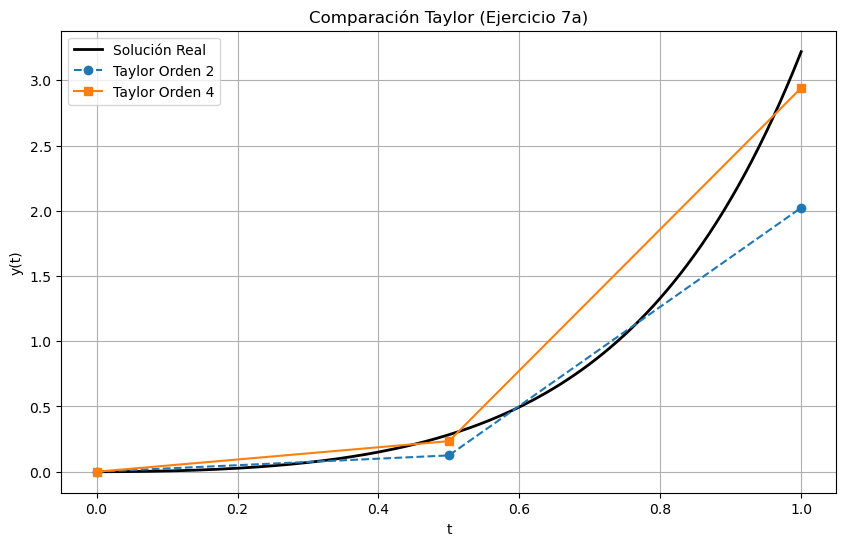

In [76]:
t0, y0, tf, h = 0, 0, 1, 0.5
_, w_6a_t4 = metodo_taylor_4orden(f_6a, f_6a_p1, f_6a_p2, f_6a_p3, t0, y0, tf, h)

df_6a = pd.DataFrame({
    't_i': t_6a,
    'Taylor O2': w_6a_t2,
    'Taylor O4': w_6a_t4,
    'Valor Real': y_exact_6a(t_6a)
})
print("--- Comparación de Métodos de Taylor (Ejercicio 6a) ---")
print(df_6a.to_string())
graficar_comparacion_taylor(t_6a, w_6a_t2, w_6a_t4, y_exact_6a, t0=0, tf=1, titulo="Comparación Taylor (Ejercicio 7a)")


**b)** 


--- Comparación de Métodos de Taylor (Ejercicio 6b) ---
      t_i  Taylor O2  Taylor O4  Valor Real
0 2.00000    1.00000    1.00000     1.00000
1 2.50000    1.75000    1.81250     1.83333
2 3.00000    2.42578    2.48592     2.50000


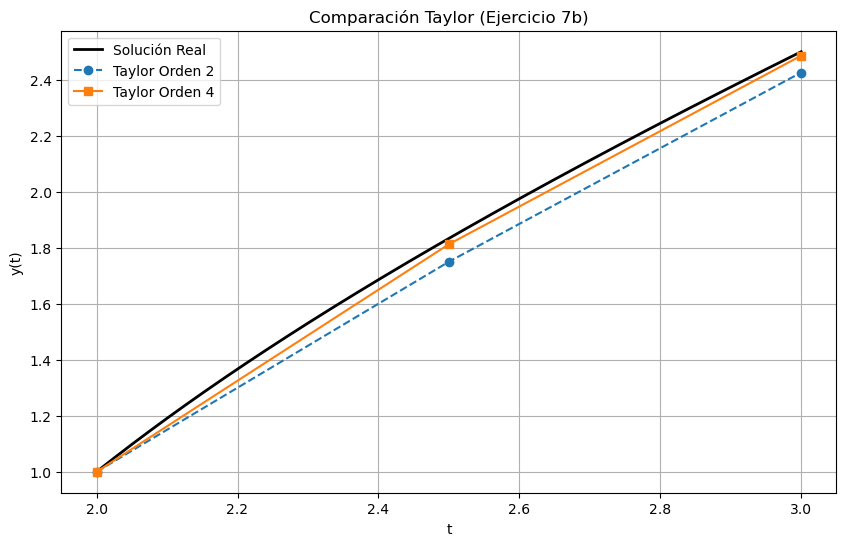

In [75]:
t0, y0, tf, h = 2, 1, 3, 0.5
_, w_6b_t4 = metodo_taylor_4orden(f_6b, f_6b_p1, f_6b_p2, f_6b_p3, t0, y0, tf, h)

df_6b = pd.DataFrame({
    't_i': t_6b,
    'Taylor O2': w_6b_t2,
    'Taylor O4': w_6b_t4,
    'Valor Real': y_exact_6b(t_6b)
})
print("\n--- Comparación de Métodos de Taylor (Ejercicio 6b) ---")
print(df_6b.to_string())
graficar_comparacion_taylor(t_6b, w_6b_t2, w_6b_t4, y_exact_6b, t0=2, tf=3, titulo="Comparación Taylor (Ejercicio 7b)")


**c)**


--- Comparación de Métodos de Taylor (Ejercicio 6c) ---
      t_i  Taylor O2  Taylor O4  Valor Real
0 1.00000    2.00000    2.00000     2.00000
1 1.25000    2.78125    2.77897     2.77893
2 1.50000    3.61250    3.60827     3.60820
3 1.75000    4.48542    4.47942     4.47933
4 2.00000    5.39405    5.38640     5.38629


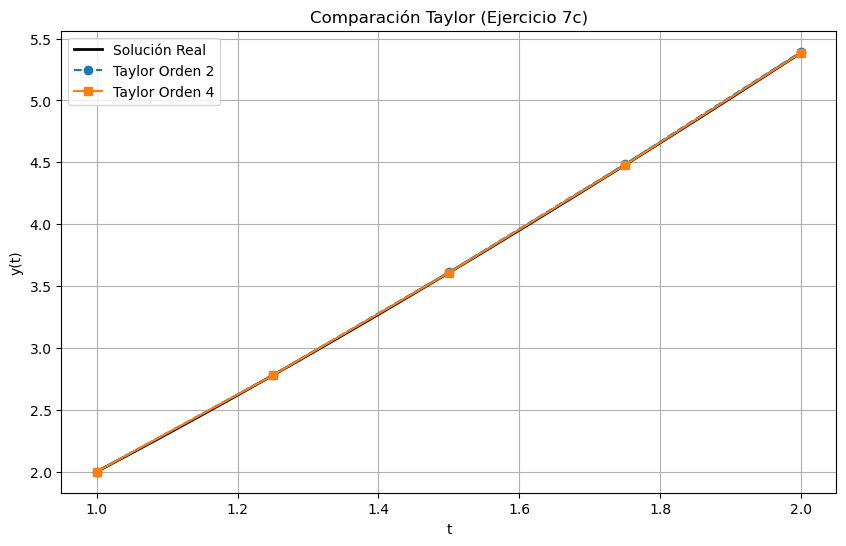

In [74]:
t0, y0, tf, h = 1, 2, 2, 0.25
_, w_6c_t4 = metodo_taylor_4orden(f_6c, f_6c_p1, f_6c_p2, f_6c_p3, t0, y0, tf, h)

df_6c = pd.DataFrame({
    't_i': t_6c,
    'Taylor O2': w_6c_t2,
    'Taylor O4': w_6c_t4,
    'Valor Real': y_exact_6c(t_6c)
})
print("\n--- Comparación de Métodos de Taylor (Ejercicio 6c) ---")
print(df_6c.to_string())
graficar_comparacion_taylor(t_6c, w_6c_t2, w_6c_t4, y_exact_6c, t0=1, tf=2, titulo="Comparación Taylor (Ejercicio 7c)")


**d)** 


--- Comparación de Métodos de Taylor (Ejercicio 6d) ---
      t_i  Taylor O2  Taylor O4  Valor Real
0 0.00000    1.00000    1.00000     1.00000
1 0.25000    1.34375    1.32894     1.32915
2 0.50000    1.77219    1.72967     1.73049
3 0.75000    2.11068    2.03993     2.04147
4 1.00000    2.20164    2.11599     2.11798


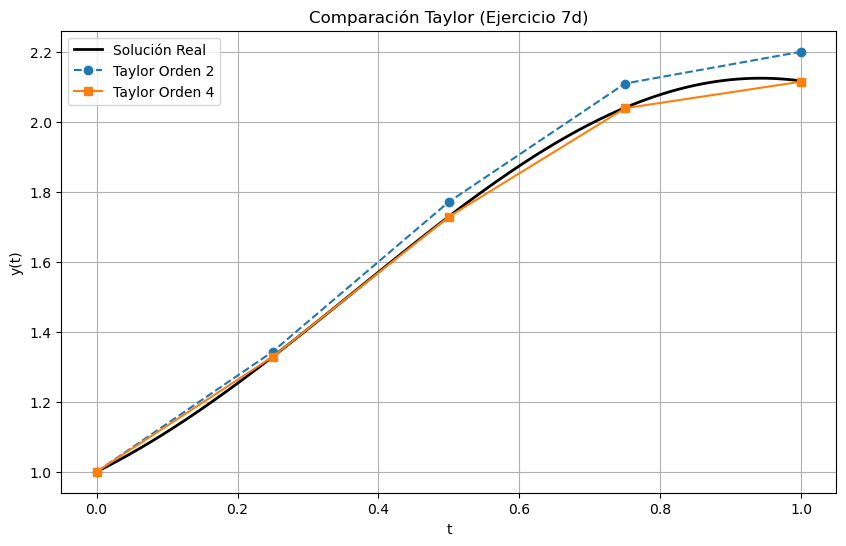

In [73]:
t0, y0, tf, h = 0, 1, 1, 0.25
_, w_6d_t4 = metodo_taylor_4orden(f_6d, f_6d_p1, f_6d_p2, f_6d_p3, t0, y0, tf, h)

df_6d = pd.DataFrame({
    't_i': t_6d,
    'Taylor O2': w_6d_t2,
    'Taylor O4': w_6d_t4,
    'Valor Real': y_exact_6d(t_6d)
})
print("\n--- Comparación de Métodos de Taylor (Ejercicio 6d) ---")
print(df_6d.to_string())
graficar_comparacion_taylor(t_6d, w_6d_t2, w_6d_t4, y_exact_6d, t0=0, tf=1, titulo="Comparación Taylor (Ejercicio 7d)")
